In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [36]:
# intial steps for exploring and cleaning the building violations dataset. 

# importing the dataset
df = pd.read_csv(r"building_violations.csv")

#removing any duplicate rows just in case
df.drop_duplicates(inplace=True)

# initial analysis of the columns data types. 

print( "Prior to cleaning, the dataset has (rows, columns): ", df.shape, '\n')
print(df.info())
print( df.describe(), '\n')
#print (df.nunique())

#looking at the number of null values per column 
print("The number of null values on each column is: \n", df.isnull().sum(),'\n')


# dropping columns from dataset that are empty have many missing values, or
# are not very important at the time for current analysis 

df = df.drop('value', axis=1) # column has no values. 
df = df.drop('contact_addr2', axis=1) # column  has many missing values.
df = df.drop('ap_case_defn_key', axis=1)# column only has value 1013 repeated over and over again
df = df.drop('violation_sthigh', axis=1) # column has many missing values and is supplementary to stno


# renaming some column names for easier readability 
df.rename(columns={'status_dttm': 'date'}, inplace=True)

#dropping rows where dates are missing 
df.dropna(subset=['date'], inplace=True)


# CONVERTING TO RIGHT DATA TYPES 

#converting the date column to date type for easier manipulation
df['date'] = pd.to_datetime(df['date'])
#converting sam_id to string type since it represents an id and should not be an int 
df['sam_id'] = df['sam_id'].astype(str)

#Adding a Year column for grouping rows by year in subsequent analysis 
df['year'] = df['date'].dt.year


#Printing descriptive data of df after cleaning 
print( "After cleaning, the dataset has (rows, columns): ", df.shape, '\n')
print(df.info(), '\n')
print( df.describe())


Prior to cleaning, the dataset has (rows, columns):  (15652, 26) 

<class 'pandas.core.frame.DataFrame'>
Index: 15652 entries, 0 to 15667
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           15652 non-null  object 
 1   ap_case_defn_key  15652 non-null  int64  
 2   status_dttm       15650 non-null  object 
 3   status            15652 non-null  object 
 4   code              15652 non-null  object 
 5   value             0 non-null      float64
 6   description       15410 non-null  object 
 7   violation_stno    15652 non-null  object 
 8   violation_sthigh  4627 non-null   object 
 9   violation_street  15652 non-null  object 
 10  violation_suffix  15539 non-null  object 
 11  violation_city    15649 non-null  object 
 12  violation_state   15652 non-null  object 
 13  violation_zip     15649 non-null  object 
 14  ward              15652 non-null  object 
 15  contact_addr1     15647 n

The number of violations per year are:  year
2010    1458
2011    1188
2012    1505
2013    1476
2014    1508
2015    1686
2016     961
2017     954
2018     784
2019     934
2020     732
2021     691
2022     911
2023     685
2024     167
dtype: int64


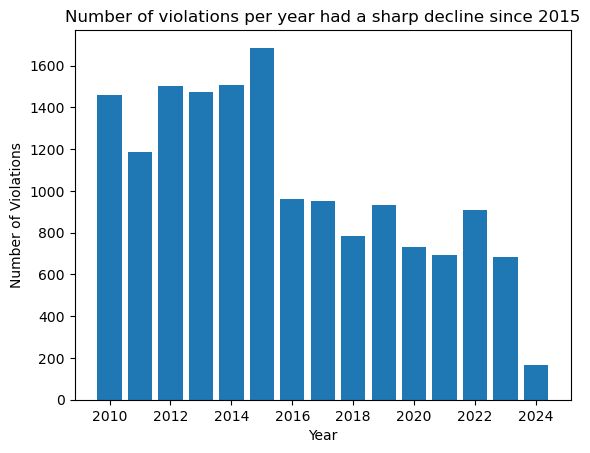

In [46]:
# Basic Analysis of number of violations over the years.

# looking at number of violations per year 
violations_per_year = df.groupby('year').size()
print("The number of violations per year are: ", violations_per_year)

#dropping the year 2009 since it only has 10 observations 
df = df[df['year'] != 2009]

#Making a simple visualization of violations over time 
plt.bar(violations_per_year.index, violations_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.title('Number of violations per year had a sharp decline since 2015')


plt.show()

In [ ]:
# Attempting to see any trends for different violation codes to see
# if any violation type has been on the rise 

In [53]:

# Grouping violations by year and code
year_code_count = df.groupby(['year', 'code']).size().reset_index(name='count')

# Selecting the three largest groups per year 
top_codes_per_year = year_code_count.groupby('year')['count'].nlargest(3).reset_index()

# Extract the indices of the top codes to keep
indices_to_keep = top_codes_per_year['level_1']

# Identify the top codes grouping the other codes into a separate 'Other' group
top_year_code_count = year_code_count.loc[indices_to_keep].copy()
other_year_code_count = year_code_count.drop(indices_to_keep).copy()
other_year_code_count['code'] = 'Other'
final_year_code_count = pd.concat([top_year_code_count, other_year_code_count])

# Regrouping by code and years after
final_counts = final_year_code_count.groupby(['year', 'code']).agg({'count': 'sum'}).reset_index()

# Sorting results 
final_counts = final_counts.sort_values(by=['year', 'count'], ascending=[True, False])

print(final_counts)

    year           code  count
3   2010          Other    811
0   2010          110.1    350
2   2010  Chapter 103.1    171
1   2010          121.1    126
7   2011          Other    761
5   2011          105.1    174
6   2011          116.2    146
4   2011        101.4.4    107
11  2012          Other    727
9   2012          105.1    362
10  2012          116.2    340
8   2012        101.4.4     76
15  2013          Other    561
14  2013          116.2    448
13  2013          105.1    372
12  2013          104.6     95
19  2014          Other    617
17  2014          105.1    401
18  2014          116.2    374
16  2014          104.6    116
23  2015          Other    736
22  2015          116.2    443
20  2015          105.1    418
21  2015          116.1     89
27  2016          Other    385
25  2016          105.1    268
26  2016          116.2    230
24  2016          102.8     78
31  2017          Other    324
29  2017          105.1    315
30  2017          116.2    244
28  2017

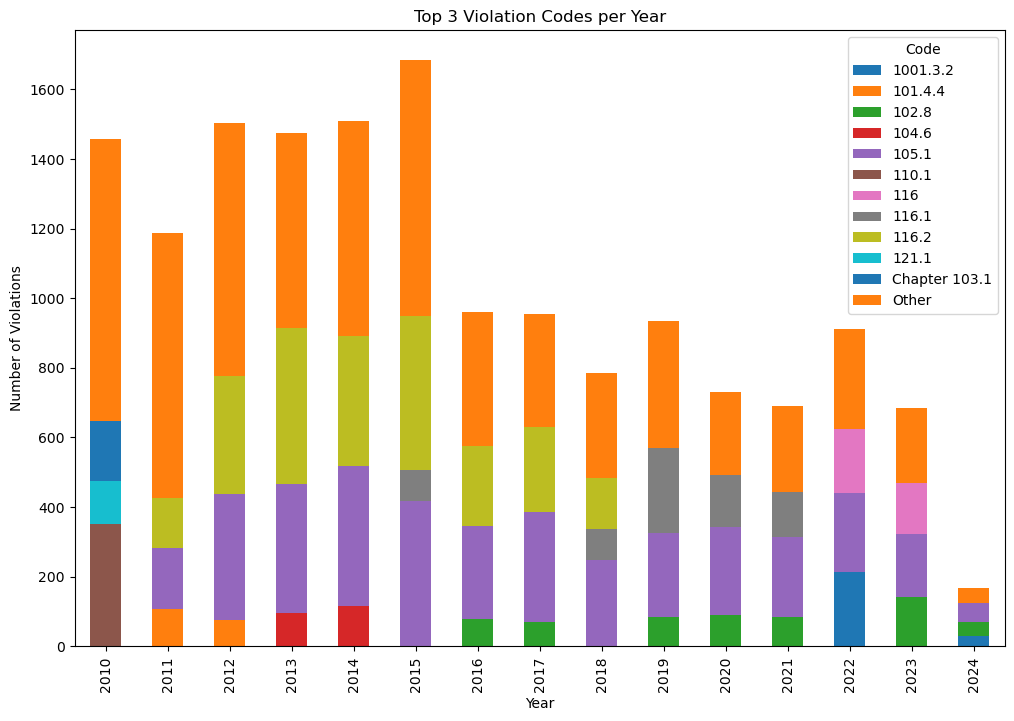

In [52]:
# Pivot the final dataframe for visualization
pivot_df = final_counts.pivot(index='year', columns='code', values='count')

# Plotting the stacked bar chart.
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 3 Violation Codes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.legend(title='Code')
plt.show()